<center>
<img src="caratula.png" alt="drawing" width="1200"/>
</center>

<br><br><br><br>

# Regresión Lineal

In [1]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/classic/rhukgajc?embed', width=1400, height=600)

<br><br>

## Función

$$ \Large y = f(\textbf{X}, \theta):$$

$$ \Large \textbf{X}\in\mathbb{R}^n,\,\, y\in\mathbb{R} ,  $$

$$ \Large \theta    \in\mathbb{R}^k. $$ 

## Minimizar el error cuadrático medio

$$ \Large \mathcal{L}(\textbf{X},y,\theta)=\min_{\theta} \sum_{i=1}^M ( \theta_1 x_i + \theta_0 - y_i )^2$$

## Pseudoinversa

$$ \Large \theta=\left( \hat{\textbf{X}}^T\hat{\textbf{X}} \right)^{-1}\hat{\textbf{X}}^Ty$$

### donde
$$ \Large \hat{\textbf{X}} = 
    \begin{pmatrix}
      x_{1,1}& x_{1,2} & \cdots & x_{1,N}& 1\\
      x_{2,1}& x_{2,2} & \cdots & x_{2,N}& 1\\
      \vdots &         & \ddots &        & \vdots\\
      x_{M,1}& x_{M,2} & \cdots & x_{M,N}& 1\\
    \end{pmatrix} $$

## Regresión Lineal $\rightarrow$ Clasificador

In [2]:
IFrame('https://www.geogebra.org/classic/wqhdtz6v?embed', width=1400, height=600)

# Decisión

In [3]:
IFrame('https://www.geogebra.org/classic/ertr6snf?embed', width=1400, height=600)

# Umbral óptimo

In [4]:
IFrame('https://www.geogebra.org/classic/aj8xcpxa?embed', width=1400, height=600)

In [1]:
import pdb

import numpy   as np
import pandas  as pd
import seaborn as sns; sns.set(style="ticks", palette="pastel")

from matplotlib           import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use({  'figure.figsize'    :(12,4),
                 'axes.titlesize'    :20,
                 'axes.titleweight'  :True,
                 'lines.markersize'  :14,
                 'axes.grid'         :True,
                 'axes.labelsize'    :16,
                 'xtick.labelsize'   :14,
                 'xtick.major.width' :True,
                 'ytick.labelsize'   :14,
                 'ytick.major.width' :True, 
                 'lines.linewidth'   :2.5   })

def pseudo_inv (X: np.array, Y: np.array)->np.array:
    """
      Compute the pseudoinverse matrix for regression/classification
        -> pinv = (X^T X)^-1 X^T y
        
      @param X: -> shape = (n_samples,k_features)
      @param Y: -> shape = (n_samples,1)
      
      @return pinv: -> shape = (k_features,1)
    """
    pinv = X.T  @ X            #np.dot( X.T,X )
    pinv = np.linalg.inv(pinv)
    pinv = pinv @ X.T          #np.dot( pinv,X.T )
    pinv = pinv @ Y            #np.dot( pinv,Y   )
    
    return pinv

def extend_x(X: np.array)->np.array:
    """
      Appends a colum of ones to the X matrix
        -> X_ex = [X Ones]
      
      @param X: -> shape = (n_samples,k_features)
      
      @return X_ex: -> shape = (n_samples,k_features+1)
    """
    ones = np.ones( X.shape[0] )[:,np.newaxis]
    
    return np.concatenate( (X,ones), axis=-1 ).copy()

# Ejemplo Toy

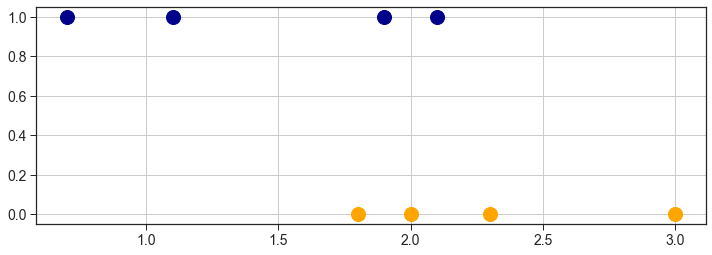

In [2]:
data = np.array( [[1.9, 1],
                  [0.7, 1],
                  [2.0, 0],
                  [2.3, 0],
                  [3.0, 0],
                  [2.1, 1],
                  [1.8, 0],
                  [1.1, 1] ])

mask = data[:,1]==1
plt.plot( data[ mask,0],data[ mask,1],'o',color='darkblue', )
plt.plot( data[~mask,0],data[~mask,1],'o',color='orange' )
plt.show()

In [7]:
X_Train, Y_Train = data[:,0:1], data[:,1:2]

W = pseudo_inv( extend_x( X_Train ),Y_Train  )
W

array([[-0.471597  ],
       [ 1.37834941]])

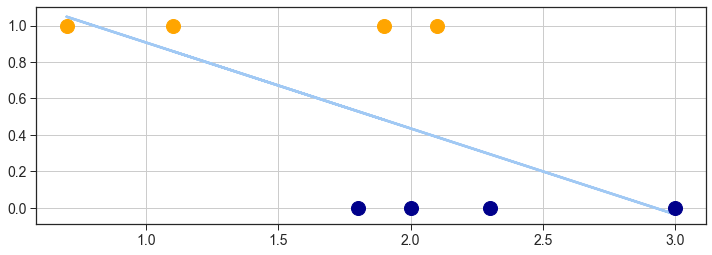

In [8]:
y = np.dot(  extend_x( X_Train ),W  )
plt.plot( X_Train,y )

mask = Y_Train == 0
plt.plot( X_Train[ mask],Y_Train[ mask],'o',color='darkblue' )
plt.plot( X_Train[~mask],Y_Train[~mask],'o',color='orange' )
plt.show()

# Ejemplo 2D

In [9]:
params                     = {}
PATH                       = '/home/omarpr/git/machine_learning/data/'
params['fname_uninormals'] = 'CNIB 2020 TWO UNIV NORMALS 2.csv'


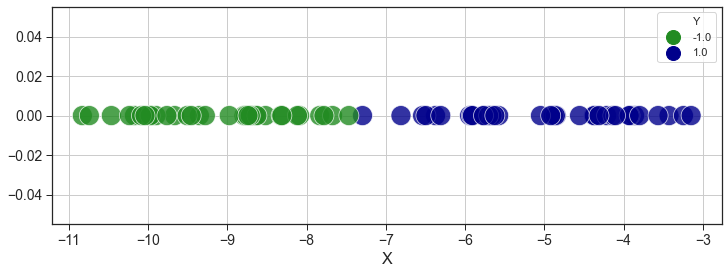

In [10]:
#Leer CSV
data  = pd.read_csv( PATH+params['fname_uninormals'] )

#Graficar:
y     = np.zeros( data.shape[0] )
sns.scatterplot( x='X', y=y, hue='Y', data=data,
                  palette =['forestgreen','darkblue'],
                  s       =400,
                  alpha   =.8)
plt.show()

In [11]:
#Importante
def data_split( data,N ):
    
    P     = data.shape[0]-N
    index = np.arange( data.shape[0] ); np.random.shuffle(index)
    
    Train = data.iloc[index[  :N]]
    Test  = data.iloc[index[-P: ]]
    
    return Train, Test

In [17]:
N     = 30

Train, Test = data_split( data,N )

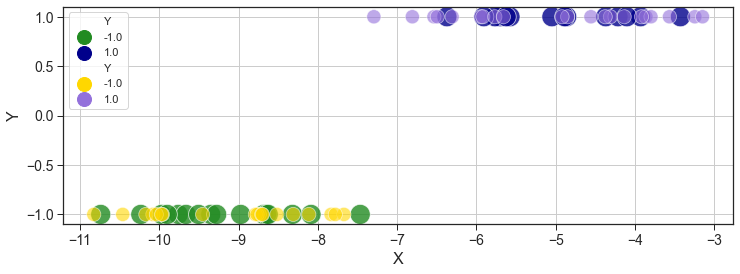

In [18]:
sns.scatterplot( x='X', y='Y', hue='Y', data=Train,
                  palette =['forestgreen','darkblue'],
                  s       =400,
                  alpha   =.8)

sns.scatterplot( x='X', y='Y', hue='Y', data=Test,
                  palette =['gold','mediumpurple'],
                  s       =200,
                  alpha   =.6)
plt.show()

In [19]:
Train.Y[:10]

65   -1.0
16    1.0
21    1.0
35   -1.0
3     1.0
13    1.0
26    1.0
37   -1.0
18    1.0
5     1.0
Name: Y, dtype: float64

In [20]:
X_Train = extend_x( Train.X.values[:,np.newaxis] )
X_Train[:10]

array([[-10.73961523,   1.        ],
       [ -5.7023354 ,   1.        ],
       [ -4.86112462,   1.        ],
       [ -8.68285325,   1.        ],
       [ -5.76588315,   1.        ],
       [ -4.36847122,   1.        ],
       [ -5.04803126,   1.        ],
       [ -8.64802283,   1.        ],
       [ -4.21404362,   1.        ],
       [ -3.42650044,   1.        ]])

In [21]:
Y_Train = Train.Y.values[:,np.newaxis]
Y_Train[:10]

array([[-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.]])

In [22]:
W = pseudo_inv(X_Train,Y_Train)
W

array([[0.40921663],
       [2.89320804]])

In [26]:
X_Test = extend_x( Test.X.values[:,np.newaxis] )
Y_Test = Test.Y.values[:,np.newaxis]

In [27]:
L = X_Test @ W
L

array([[ 1.1294123 ],
       [ 0.90834894],
       [-0.31226392],
       [ 1.31299111],
       [ 0.46129742],
       [ 1.33904742],
       [ 0.21875487],
       [-0.24610709],
       [ 0.31246161],
       [-1.23254774],
       [ 1.02920881],
       [ 1.20095496],
       [ 1.56546572],
       [-1.18310631],
       [-0.97573618],
       [-1.26881391],
       [-0.68262539],
       [ 0.47090706],
       [-0.09149828],
       [ 1.29028667],
       [ 1.60502611],
       [-1.53760554],
       [ 1.10290675],
       [ 0.53330857],
       [-0.703465  ],
       [ 0.57720926],
       [-0.69439165],
       [-1.38801711],
       [-0.42719365],
       [ 0.88007464],
       [-1.21444221],
       [-0.67095483],
       [-0.59209057],
       [-0.66708051],
       [ 1.43461682],
       [ 0.2358634 ],
       [-0.50780238],
       [ 0.1070593 ],
       [-0.29052552],
       [-1.18736986]])

In [32]:
L = 2*(L>0.)-1   # 2*(  (X_Test @ W)  < 0.5  ) - 1

In [33]:
def compare(Y, L, ticks=True):
    if ticks:
        for i,j in zip(Y,L):
            res = [i[0], j[0]]
            if res[0] == res[1]:
                res += [u"✓"]
            else:
                res += [u"✘"]
            
            print( "{:4.1f}, {:4.1f}, {}".format(*res) )
    
    plt.pcolormesh(L==Y,cmap='cool')

 1.0,  1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
 1.0, -1.0, ✘
 1.0,  1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
 1.0,  1.0, ✓
-1.0, -1.0, ✓
-1.0, -1.0, ✓


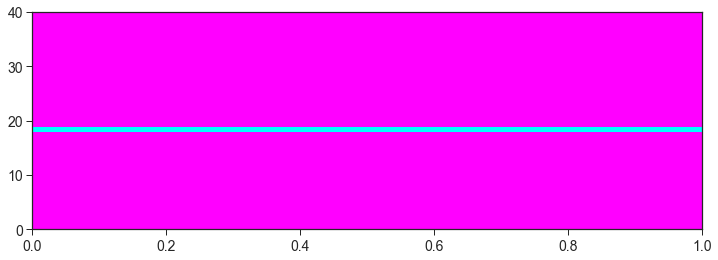

In [34]:
compare(Y_Test, L)

# Ejemplo 2D $\rightarrow$ ver script 

In [35]:
params['fname_binormals'] = 'CNIB 2020 TWO BIV NORMALS.csv'

data = pd.read_csv( PATH+params['fname_binormals'] )

data['Y'] = data['Y'].astype('int')

300

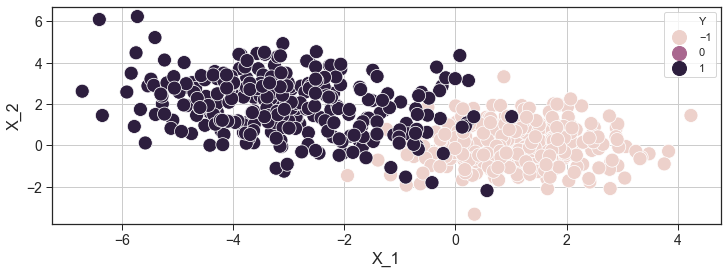

In [36]:
#Graficar
sns.scatterplot(x='X_1', y='X_2',hue='Y',data=data)
sum(data.Y<1)

In [40]:
N     = 300

Train, Test = data_split( data,N )

In [41]:
X_Train = Train.loc[:,['X_1','X_2']].values
Y_Train = Train.Y                   .values [:,np.newaxis]

W = pseudo_inv( extend_x(X_Train),Y_Train )
W

array([[-0.31271255],
       [ 0.11200159],
       [-0.43136911]])

In [42]:
X_Test = extend_x( Test.loc[:,['X_1','X_2']].values )
Y_Test =           Test.Y                   .values[:,np.newaxis]

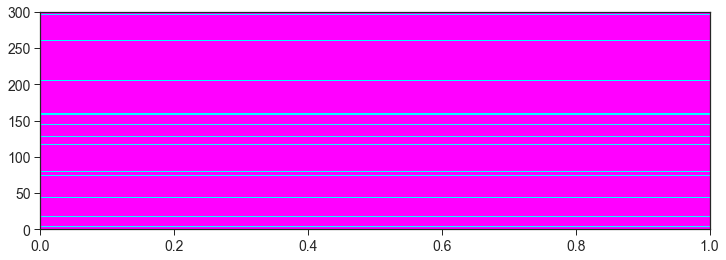

In [ ]:
L = X_Test @ W
L = 2*(L>0)-1

compare(Y_Test, L, False)

# Aplicaciones

In [5]:
IFrame('https://www.youtube.com/embed/nW5AOUbvmFE', width=1400, height=600)

<br><br><br>
# Scenario Screen
<center>
<img src="scenario_screen.png" alt="drawing" width="800"/>
</center>

<br><br><br><br><br>

# ¿Hay otros clasificadores basados en la regresión lineal?

## Least Absolute Shrinkage Selector Operator LASSO:
$$\Large \mathcal{L}(\textbf{X},y,\theta)=\min_{\theta} \left( \sum_{i=1}^M ( \theta^T x_i + \theta_0 - y_i )^2 -  \lambda\sum_{j=0}^M \left|\theta_j\right| \right)$$

## Ridge Regression:
$$\Large \mathcal{L}(\textbf{X},y,\theta)=\min_{\theta} \left( \sum_{i=1}^M ( \theta^T x_i + \theta_0 - y_i )^2 -  \lambda\sum_{j=0}^M \left(\theta_j\right)^2 \right)$$

<br><br><br><br><br><br>
<center>
<img src="caratula.png" alt="drawing" width="800"/>
</center>

# [https://www.researchgate.net/profile/Omar_Pina-Ramirez](https://www.researchgate.net/profile/Omar_Pina-Ramirez)
# [https://github.com/delozath/](https://github.com/delozath/)